In [1]:
import random

import pandas

from tcp_fits import Call

from tcp_fits.profiles import TypeProfile

In [2]:
def random_ints_array(size, max_abs=100):
    return random.choices(range(-max_abs, max_abs), k=size)

In [27]:
size_range = range(1500, 2000)
profile = TypeProfile(
    [Call('list', random_ints_array(size)) for size in size_range],
    Call('pop'), Call('copy'),
    index=pandas.Index(size_range, name='List length'), loops=10, overfit=-6, fraction=0.7)

In [28]:
profile.fit_all_with(Call('polynomial', *[1, 2]))

In [29]:
profile.best_fits

,fit,degree,cost
pop,(-0.0014 ± 0.0018) + (0.0000181 ± 0.0000010)x,1,0.000007
copy,(-0.00306 ± 0.00040) + (0.00002038 ± 2.3E-7)x,1,0.000002


In [31]:
assert list(profile.best_fits.degree) == [1]*2

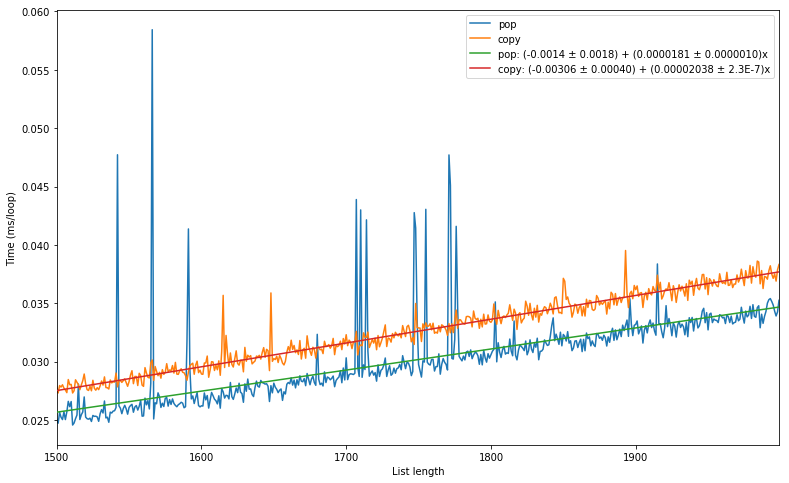

In [32]:
profile.show()